In [91]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [5]:
df = pd.read_csv("churn_clean.csv")
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [7]:
#Cutting down irrelevant features.
columns = ['Age', 'Income', 'Population', 'MonthlyCharge']
df = df[columns]
df.head()

,Age,Income,Population,MonthlyCharge
0,68,28561.99,38,172.455519
1,27,21704.77,10446,242.632554
2,50,9609.57,3735,159.947583
3,48,18925.23,13863,119.956840
4,83,40074.19,11352,149.948316


In [82]:
# Initializing & Scaling Data
scaler= StandardScaler()
scaler.fit(df)
scaler_array = scaler.transform(df)
scaled_df = pd.DataFrame(scaler_array, columns=df.columns)

scaled_df.to_csv("cleaneddata.csv")
scaled_df.head()

,Age,Income,Population,MonthlyCharge
0,0.720925,-0.398778,-0.673405,-0.003943
1,-1.259957,-0.641954,0.047772,1.630326
2,-0.148730,-1.070885,-0.417238,-0.295225
3,-0.245359,-0.740525,0.284537,-1.226521
4,1.445638,0.009478,0.110549,-0.528086


In [67]:
model = KMeans(n_clusters=5, random_state=5)
model.fit(scaled_df)
clusters = model.fit_predict(scaled_df)

Text(0.5, 0.92, 'K-means Clustering Results')

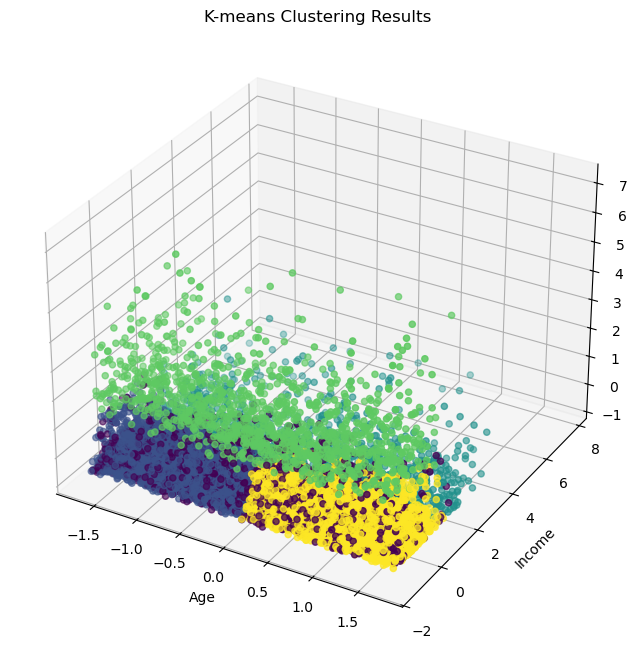

In [71]:
# Create 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Choose first three columns for visualization
feature1, feature2, feature3 = df.columns[0:3]  # Gets first three column names

# Create scatter plot with different colors for each cluster
scatter = ax.scatter(scaled_df[feature1], 
                    scaled_df[feature2], 
                    scaled_df[feature3],
                    c=scaled_df['cluster'],
                    cmap='viridis')

# Add labels
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(feature3)
#Z isn't showing, but it's population
plt.title('K-means Clustering Results')

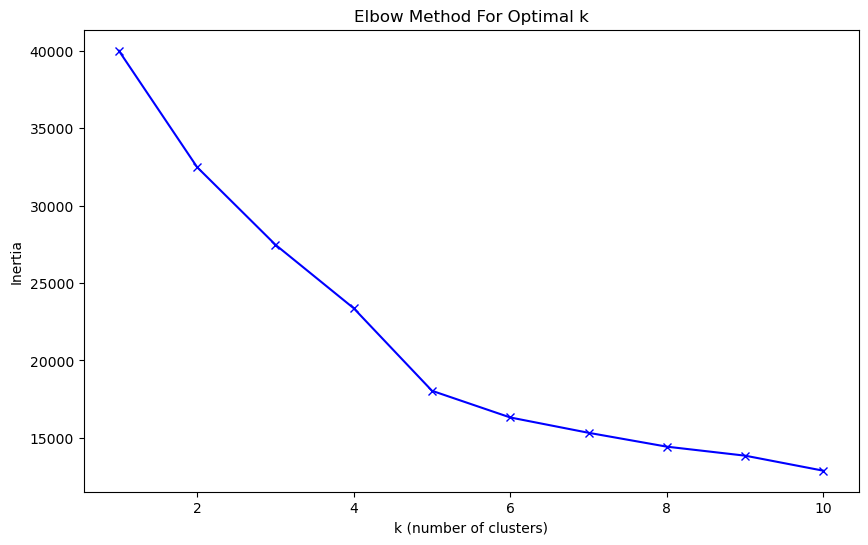

In [84]:
inertias = []
k_range = range(1, 11)  # Testing from 1 to 10 clusters

for k in k_range:
    km = KMeans(n_clusters=k, random_state=5)
    km.fit(scaled_df)
    inertias.append(km.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k (number of clusters)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [99]:
X = scaled_df.iloc[:, :-1] # Getting Clusters out for scoring purposes

# Calculate various clustering metrics
silhouette = silhouette_score(X, clusters)
calinski = calinski_harabasz_score(X, clusters)
davies = davies_bouldin_score(X, clusters)

print("Clustering Quality Metrics:")
print(f"Silhouette Score: {silhouette:.3f}")
print(f"Calinski-Harabasz Score: {calinski:.3f}")
print(f"Davies-Bouldin Score: {davies:.3f}")
print(f"Inertia: {model.inertia_:.3f}")

Clustering Quality Metrics:
Silhouette Score: 0.165
Calinski-Harabasz Score: 3191.652
Davies-Bouldin Score: 1.775
Inertia: 18039.504
